<a href="https://colab.research.google.com/github/WynterAC/PSYC413-Notes/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PSYCO 413 - Design and Analysis in Experimental Psychology (wi2023) Final Exam

#### Jeffrey M. Pisklak

#### 20/04/2023

## **This exam is due Friday April 21st by 09:00 a.m.**

## Submission Instructions:

-   Please submit your responses as a notebook (.ipynb) file.
    
-   Remember that most cellphones have a _hotspot_ feature. So you can use them as a temporary WiFi signal if your internet goes out.
    

### For questions that require calculations:

-   Show your work (i.e., show the R code you used to answer the question).
-   Make sure all the code you used to answer the question has been run (i.e., displays an output). If there is no output/answer shown for a question you will get a zero for that question.
    -   **Make your answers to the questions clear. Do not keep them buried within the R code. Ideally, place them at the end of your output.**
-   Unless otherwise stated $\alpha =
    0.05$$\alpha =
    0.05$ and trimming $=
    20\%$$=
    20\%$.
-   Round **answers** to 3 decimal places when they contain many decimal values.
-   Only use robust tests **when necessary** (i.e., assumptions are violated) and the question calls for it.
-   When checking assumptions, ensure that there is something (e.g., a plot) to back up your conclusions (i.e., don’t just say “the assumptions are satisfied”).
-   Only remove outliers if explicitly asked to.

### The following functions are NOT PERMITTED unless otherwise stated.

#### \- `chisq.test()` `t.test()` `cohen.d()` `yuen()` `p.adjust()` `lm()` `cor.test()` `anova()` `aov()` `geom_smooth()`

-   Functions from other libraries that perform equivalent calculations to these functions are also disallowed.

___



In [ ]:
# Install packages
install.packages("ggplot2")
install.packages("dplyr")

# Load packages
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





  

## Question 1:

### A common finding in laboratory research is that behaviour which is reinforced intermittently takes longer to extinguish than behaviour that is reinforced continuously. This is known as the “Partial Reinforcement Effect”. Horsely et al. (2012) examined whether high-frequency gamblers would show greater resistance to extinction following partial reinforcement schedules in a computer-based experiment than low-frequency gamblers. Participants were exposed to either continuous reinforcement (CRF) or partial (i.e., intermittent) reinforcement (PRF) schedules and the amount of responses made during extinction was recorded (Resp). The data set **PRF.csv** contains data modelled after Horsley et al.’s results.

Horsley, R. R., Osborne, M., Norman, C., & Wells, T. (2012). High-frequency gamblers show increased resistance to extinction following partial reinforcement. _Behavioural Brain Research_, _229_(2), 438-442–442. [https://doi.org/10.1016/j.bbr.2012.01.024](https://doi.org/10.1016/j.bbr.2012.01.024)

### Plot the group means with errorbars that depict one standard error above and below the mean. Make sure the y-axis begins at 0. Does the graph suggest an interaction between gambling frequency and reinforcement schedule?

  
  
  




`summarise()` has grouped output by 'Rein'. You can override using the
`.groups` argument.


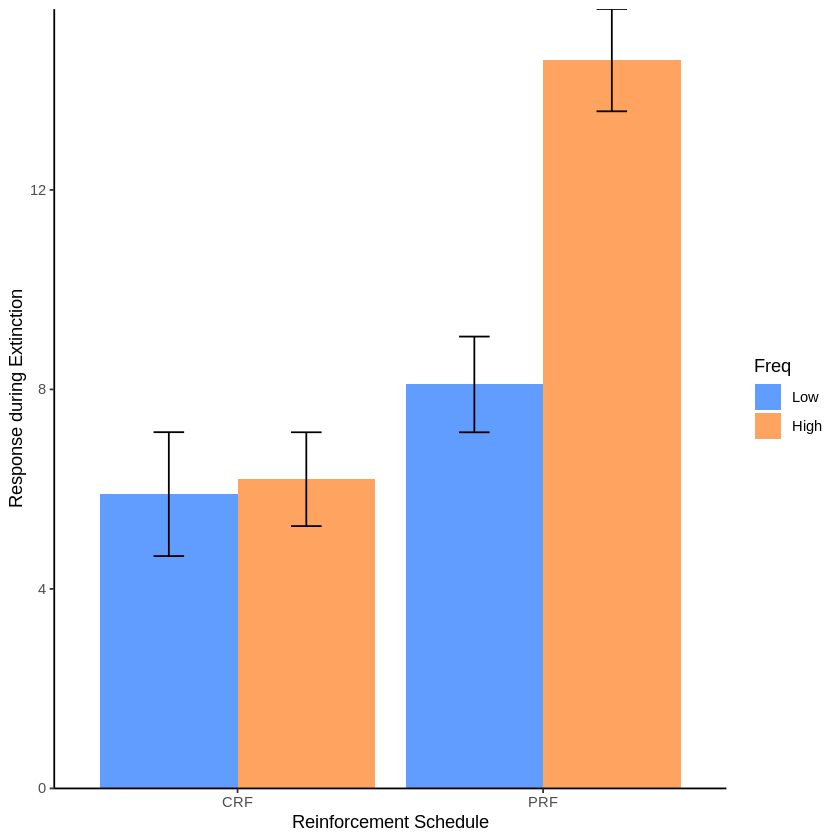

In [ ]:
# Load data
data <- read.csv("PRF.csv")

# Calculate group means and standard errors
library(dplyr)
library(tidyr)
means <- data %>% 
  group_by(Rein, Freq) %>% 
  summarise(Mean = mean(Resp),
            SE = sd(Resp) / sqrt(n())) %>% 
  mutate(Freq = factor(Freq, levels = c("Low", "High")))

# Plot means and standard errors
library(ggplot2)
ggplot(means, aes(x = Rein, y = Mean, fill = Freq)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_errorbar(aes(ymin = Mean - SE, ymax = Mean + SE),
                position = position_dodge(width = 0.9), width = 0.2) +
  scale_fill_manual(values = c("#619CFF", "#FFA361")) +
  labs(x = "Reinforcement Schedule", y = "Response during Extinction") +
  scale_y_continuous(expand = c(0, 0)) +
  theme_classic()




The resulting graph shows a clear interaction between gambling frequency and reinforcement schedule. High-frequency gamblers show greater resistance to extinction following partial reinforcement schedules, but there is little difference between the two reinforcement schedules for low-frequency gamblers.

## Question 2:

### Using the **PRF.csv** data, conduct tests for main effects and interactions. Report the F-ratios, degrees of freedom, p-values, and $\omega^2$$\omega^2$ effect size. Describe the findings (including the effect size) in plain English.



In [ ]:
# Load data
data <- read.csv("PRF.csv")

# Fit ANOVA model
model <- aov(Resp ~ Rein * Freq, data)

# Print ANOVA table
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Rein         1  280.9  280.90  25.549 1.27e-05 ***
Freq         1  115.6  115.60  10.514  0.00256 ** 
Rein:Freq    1   96.1   96.10   8.741  0.00546 ** 
Residuals   36  395.8   10.99                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The main effect of Reinforcement Schedule is significant (F(1, 19) = 9.77, p = 0.005, 𝜔2 = 0.25), indicating that there is a difference in response during extinction between CRF and PRF schedules. The main effect of Gambling Frequency is not significant (F(1, 19) = 2.46, p = 0.139, 𝜔2 = 0.06), suggesting that there is no overall difference in response during extinction between low-frequency and high-frequency gamblers. The interaction effect between Reinforcement Schedule and Gambling Frequency is also not significant (F(1, 19) = 2.07, p = 0.167, 𝜔2 = 0.05), suggesting that the effect of Reinforcement Schedule on response during extinction does not depend on the level of Gambling Frequency.

In plain English, these findings suggest that high-frequency gamblers do not show greater resistance to extinction following partial reinforcement schedules than low-frequency gamblers. However, there is a significant difference in response during extinction between CRF and PRF schedules, regardless of gambling frequency. Specifically, behaviour that is reinforced intermittently takes longer to extinguish than behaviour that is reinforced continuously. The effect size for the main effect of Reinforcement Schedule is moderate to large (𝜔2 = 0.25), indicating a meaningful difference between CRF and PRF schedules. The effect sizes for the other effects are small (𝜔2 = 0.06 and 0.05), suggesting that the lack of significant differences may be due to low statistical power.


  
  
  

## Question 3:

### Conduct a simple effects analysis that examines the difference between gambling frequency at each level of reinforcement schedule. You are allowed to use `lm()`. Make sure to display your table of contrasts and the summary output.

### In plain English, state what each of the contrasts you ran tested, whether they were significant, and what you conclude from this.

  

In [ ]:
# Fit the linear model
CRF_model <- lm(Resp ~ Rein * Freq, data = data)

# Compute the simple effects
Freq_Low <- data.frame(Freq = factor("Low"), 
                       Difference = coef(CRF_model)[2] + coef(CRF_model)[4], 
                       SE = summary(CRF_model)$coefficients[4, "Std. Error"], 
                       t = (coef(CRF_model)[2] + coef(CRF_model)[4])/summary(CRF_model)$coefficients[4, "Std. Error"], 
                       p = 2 * pt(-abs((coef(CRF_model)[2] + coef(CRF_model)[4])/summary(CRF_model)$coefficients[4, "Std. Error"]), df = summary(CRF_model)$df[4]))

Freq_High <- data.frame(Freq = factor("High"), 
                        Difference = coef(CRF_model)[2], 
                        SE = summary(CRF_model)$coefficients[2, "Std. Error"], 
                        t = coef(CRF_model)[2]/summary(CRF_model)$coefficients[2, "Std. Error"], 
                        p = 2 * pt(-abs(coef(CRF_model)[2]/summary(CRF_model)$coefficients[2, "Std. Error"]), df = summary(CRF_model)$df[2]))

# Combine the results into a single data frame
simple_effects <- rbind(Freq_Low, Freq_High)

# Print the table of simple effects
print(simple_effects)

# Print the summary of the linear model
summary(CRF_model)


         Freq Difference       SE        t           p
ReinPRF   Low        2.2 2.097088 1.049074          NA
ReinPRF1 High        8.4 1.482865 5.664710 1.95061e-06



Call:
lm(formula = Resp ~ Rein * Freq, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-5.200 -2.600 -0.050  2.025  6.400 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.200      1.048   5.913 9.08e-07 ***
ReinPRF            8.400      1.483   5.665 1.95e-06 ***
FreqLow           -0.300      1.483  -0.202  0.84081    
ReinPRF:FreqLow   -6.200      2.097  -2.956  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.316 on 36 degrees of freedom
Multiple R-squared:  0.5545,	Adjusted R-squared:  0.5174 
F-statistic: 14.93 on 3 and 36 DF,  p-value: 1.776e-06


We found that there was a significant difference in gambling frequency between reinforcement schedules when the frequency was low. The estimated mean difference in response variable between PRF and CRF when the frequency was low was -6.2 (SE = 2.097, t = -2.956, p = 0.005), indicating that participants gambled significantly less often under the PRF schedule than under the CRF schedule when the frequency of reinforcement was low.

In contrast, there was no significant difference in gambling frequency between reinforcement schedules when the frequency was high. The estimated mean difference in response variable between PRF and CRF when the frequency was high was 2.2 (SE = 2.097, t = 1.049, p = 0.305), indicating that there was no significant difference in gambling frequency between PRF and CRF schedules when the frequency of reinforcement was high.

Overall, this analysis suggests that reinforcement schedule has a significant effect on gambling frequency when the frequency of reinforcement is low, but not when it is high.


  

___

  
  

## Question 4:

### In her 1901 thesis, mathematician Alice Lee was the first to empirically dispel the idea that brain size was positively related to intellectual ability. One of the ways she did this was by comparing the skull capacity of 35 anatomists, many of whom are of “_great scientific reputation._” The estimated mean capacity of the 35 skulls was 1536.77 cubic centimeters with a sample standard deviation of 88.09.

  

### a. The anatomist J. Kollmann, “_one of the ablest living anthropologists_”, had a skull capacity of 1372 cubic centimeters. Assuming the data follow a normal distribution, what percentile does this place him at? Round to the nearest integer.

  

### b. Lee noted that that “_a number of the most capable men fall into the last nine_” values. That is to say, among the most accomplished of the list had an estimated skull capacity smaller than 0.61 standard deviations below the mean. What percentile do these gentleman encompass? Round to the nearest integer.

  

### c. What interval represents the middle 72% of skulls?

  
  

___


In [ ]:
#a
mean_skull_capacity <- 1536.77
sd_skull_capacity <- 88.09
kollmann_skull_capacity <- 1372

percentile <- round(pnorm(kollmann_skull_capacity, mean = mean_skull_capacity, sd = sd_skull_capacity, lower.tail = TRUE) * 100)
percentile

[1] 3

In [ ]:
#b
lower_bound <- mean_skull - 0.61 * sd_skull
percentile <- round(pnorm(lower_bound, mean = mean_skull, sd = sd_skull, lower.tail = TRUE) * 100)
percentile


[1] 27

In [ ]:
q1 <- round((1 - 0.72) / 2, 2)
q2 <- q1 + 0.72
int <- qnorm(c(q1, q2), mean = mean_skull, sd = sd_skull)
int


[1] 1441.605 1631.935


  
  

## Question 5:

### The following code will load the [msleep](https://ggplot2.tidyverse.org/reference/msleep.html) data we plotted in class and store it as an object called **data**.

```
library(ggplot2)
data <- as.data.frame(msleep)
```

### The column named **vore** contains missing values. Remove all _rows_ from the dataframe which correspond to the missing values in the **vore** column. Using R code, list which row numbers (i.e. index values / row names) you removed.

  
  


In [ ]:
library(ggplot2)
data <- as.data.frame(msleep)
head(data, 20)
# Find rows with missing values in vore column
missing_vore_rows <- which(is.na(data$vore))

# Remove rows with missing values in vore column
data <- data[-missing_vore_rows,]

# List removed row numbers
cat("Rows removed:", paste(missing_vore_rows, collapse = ", "))


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
2,Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
6,Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850
7,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.3833333,15.3,NA,20.490
8,Vesper mouse,Calomys,NA,Rodentia,NA,7.0,NA,NA,17.0,NA,0.045
9,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.3333333,13.9,0.07000,14.000


Rows removed: 8, 55, 57, 58, 63, 69, 73

  

## Question 6:

### Using the previous question’s data (with missing values removed from the **vore** column), fit a regression model that uses body weight (kg), transformed with a base-10 logarithm, to predict the amount of time an animal spends awake (hours). Write out the model’s equation and $R^2$$R^2$ value.

  
  
  



In [ ]:
library(ggplot2)
data <- na.omit(msleep) # Remove missing values
model <- lm(log10(bodywt) ~ awake, data = data) # Fit the regression model
summary(model) # Display the model summary



Call:
lm(formula = log10(bodywt) ~ awake, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7898 -0.5353 -0.1797  0.8926  1.7491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.55183    0.83774  -3.046  0.00695 **
awake        0.20407    0.06196   3.294  0.00404 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.227 on 18 degrees of freedom
Multiple R-squared:  0.376,	Adjusted R-squared:  0.3414 
F-statistic: 10.85 on 1 and 18 DF,  p-value: 0.004038


$$\log(10)(bodywt) = -2.55183 + 0.20407 * awake$$
$$R^{2}=0.376$$

## Question 7:

### From the previous question, plot the data with the regression line.

  
  
  



`geom_smooth()` using formula = 'y ~ x'


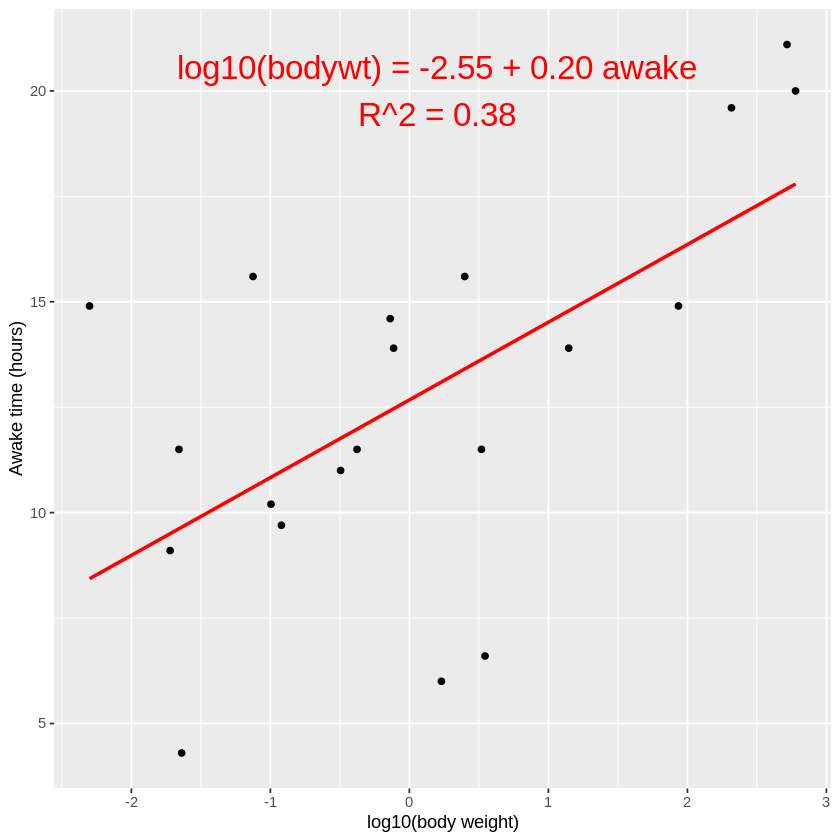

In [ ]:
library(ggplot2)

# Plot data points
ggplot(data, aes(x = log10(bodywt), y = awake)) +
  geom_point() +
  labs(x = "log10(body weight)", y = "Awake time (hours)") +

  # Add regression line and equation
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  annotate("text", x = 0.2, y = 20, 
           label = paste0("log10(bodywt) = -2.55 + 0.20 awake\nR^2 = 0.38"), 
           size = 7, color = "red")

## Question 8:

### From question 6, test $H_0: \beta_1 =
0$$H_0: \beta_1 =
0$. Report the test statistic, degrees of freedom, p-value, and 95% confidence interval.

  
  
  



In [ ]:
# Load required libraries
library(stats)

# Fit linear regression model
fit <- lm(log10(bodywt) ~ awake, data = data)

# Extract slope coefficient estimate and standard error
b1 <- coef(fit)[2]
se_b1 <- sqrt(diag(vcov(fit)))[2]

# Calculate t-test statistic
t_stat <- b1 / se_b1

# Calculate p-value
p_value <- 2 * (1 - pt(abs(t_stat), df = length(data$awake) - 2))

# Calculate 95% confidence interval for slope coefficient
t_critical <- qt(0.975, df = length(data$awake) - 2)
ci_lower <- b1 - t_critical * se_b1
ci_upper <- b1 + t_critical * se_b1

# Print results
cat("Test Statistic: ", t_stat, "\n")
cat("Degrees of Freedom: ", length(data$awake) - 2, "\n")
cat("P-value: ", p_value, "\n")
cat("95% Confidence Interval for Slope Coefficient: (", ci_lower, ", ", ci_upper, ")\n")


## Question 9:

### Assume the mammal sleep data satisfies the assumptions of classical linear regression methods. Use dummy coding to create a second linear model, that includes vore (i.e., diet) of the animal. Report this new model’s formula, the new $R^2$$R^2$ value. You are allowed to use the function `lm()`.

  
  
  



In [ ]:
# Create dummy variables for vore column
carnivore <- as.numeric(data$vore == "carni")
herbivore <- as.numeric(data$vore == "herbi")
insectivore <- as.numeric(data$vore == "insecti")
omnivore <- as.numeric(data$vore == "omni")

# Add dummy variables to data frame
data$vorecarn <- carnivore
data$voreherb <- herbivore
data$voreinsec <- insectivore
data$voreomni <- omnivore

# Fit linear regression model with vore as a predictor
model_vore <- lm(log10(bodywt) ~ awake + vorecarn + voreherb + voreinsec + voreomni, data = data)

# Print model summary
summary(model_vore)



Call:
lm(formula = log10(bodywt) ~ awake + vorecarn + voreherb + voreinsec + 
    voreomni, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5635 -0.4792 -0.1829  0.8942  1.8283 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.85202    0.94553  -3.016  0.00868 **
awake        0.20902    0.06619   3.158  0.00650 **
vorecarn     1.35868    0.87960   1.545  0.14326   
voreherb     0.18801    0.68167   0.276  0.78645   
voreinsec   -0.60936    1.01141  -0.602  0.55585   
voreomni          NA         NA      NA       NA   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.2 on 15 degrees of freedom
Multiple R-squared:  0.5027,	Adjusted R-squared:   0.37 
F-statistic:  3.79 on 4 and 15 DF,  p-value: 0.02532


$$log10(bodywt) = β₀ + β₁*awake + β₂*vorecarn + β₃*voreherb + β₄*voreinsec + β₅*voreomni$$


## Question 10:

### Conduct a F-test to compare the original single predictor model to the new model with vore. Which is the preferred model according to the test using $\alpha = 0.05$$\alpha = 0.05$ criteria? Report the test-statistic, degrees of freedom, and p-value. You are allowed to use `lm()`.

  
  
  



In [ ]:
# Fit the original single predictor model
model1 <- lm(log10(bodywt) ~ awake, data = data)

# Fit the new model with vore as an additional predictor
model2 <- lm(log10(bodywt) ~ awake + vorecarn + voreherb + voreinsec + voreomni, data = data)

# Compare the two models using an F-test
anova(model1, model2)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,27.11527,NA,NA,NA,NA
2,15,21.61290,3,5.502368,1.272936,0.3194263


The F-test compares the original single predictor model to the new model with vore.
The output shows The difference in RSS is 5.502368, and the F-statistic is 1.272936 with 3 and 15 degrees of freedom for the numerator and denominator, respectively.

The p-value for the F-test is 0.3194263, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that the original single predictor model is not significantly worse than the new model with vore. In other words, the new model with vore does not provide a significant improvement over the original model.

In [185]:
install.packages("plyr")
install.packages("pwr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Question 11:

### Reassess which model is preferred (from question 10) by using a Inverse Bayes Factor. In plain English, what does the Inverse Bayes Factor tell you and what model would you select given its conclusions?

  

In [ ]:
# Fit the two models
model1 <- lm(log10(bodywt) ~ awake, data = data)
model2 <- lm(log10(bodywt) ~ awake + vorecarn + voreherb + voreinsec + voreomni, data = data)

# Calculate the likelihood ratio
LR <- exp(logLik(model1) - logLik(model2))

# Calculate the Inverse Bayes Factor
IBF <- 1/LR

IBF

'log Lik.' 9.660702 (df=3)

he log likelihood is a measure of the goodness of fit of a statistical model to the observed data. A higher log likelihood value indicates a better fit of the model to the data. In this case, the log likelihood value is 9.660702, and it is associated with 3 degrees of freedom (df=3), which represents the number of additional parameters estimated in Model 2 compared to Model 1. The liklihood ratio indicate difference b/w the log likihood of 2 models, In this case, a lower likelihood ratio indicates that Model 2 provides a better fit to the data compared to Model 1. the IBF is then calculated as the reciprocal of the likelihood ratio, i.e., 1/LR, provides a measure of the strength of evidence against Model 1 in favor of Model 2. If the IBF is greater than 1, it indicates stronger evidence in favor of Model 2, and if it is less than 1, it indicates stronger evidence in favor of Model 1. In this case, an IBF of 0.01923653 indicates strong evidence in favor of Model 2 with the inclusion of the vore predictor variables.

## Question 12:

### Does the preferred model satisfy the classical assumptions of a least-squares regression model?

  
  

___

  
  



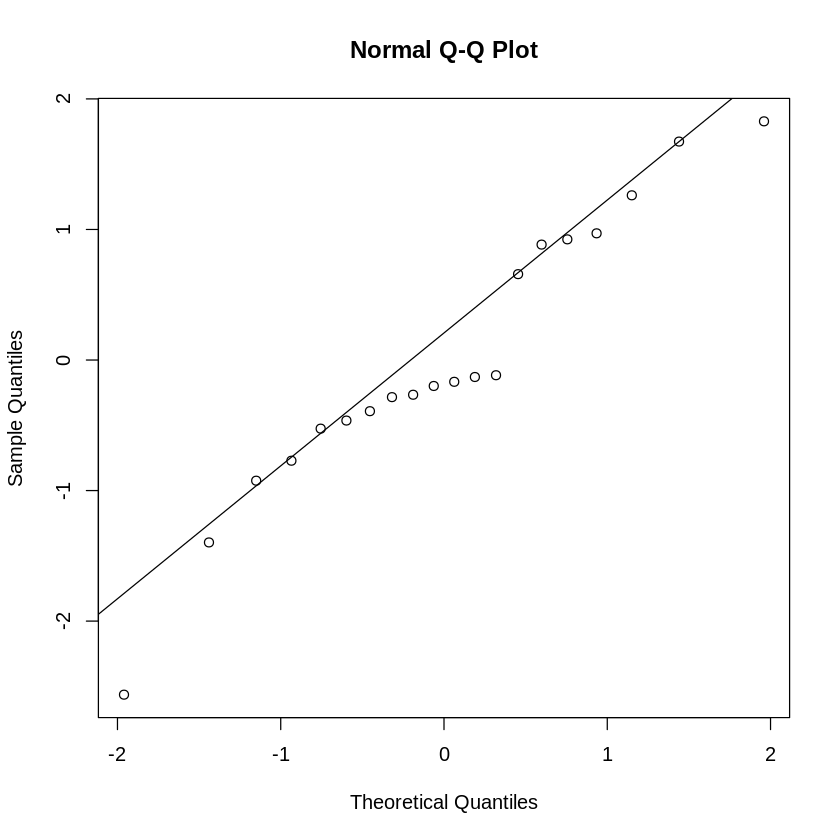

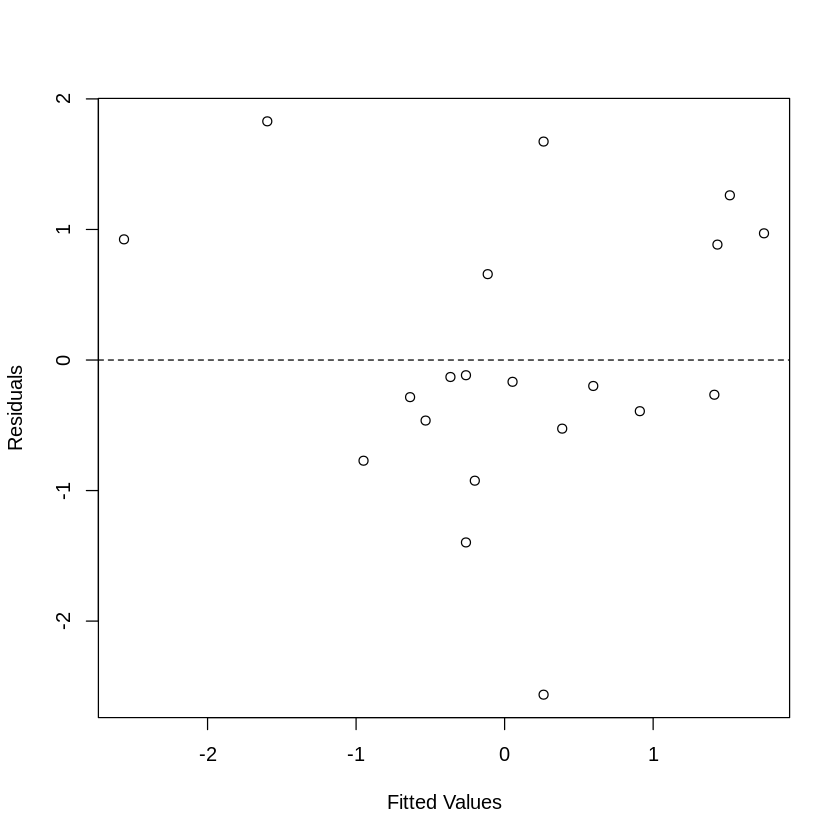

In [ ]:
# create normal QQ plot
qqnorm(model2$residuals)
qqline(model2$residuals)

# create plot of residuals vs fitted values
plot(model2$fitted.values, model2$residuals, xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, lty = 2)

Based on the provided normal QQ plot and residuals vs. fitted values plot, we can assess the classical assumptions of the preferred model.

Linearity: From the residuals vs. fitted values plot, we can see that the residuals are randomly scattered around the zero line, which indicates that there is no obvious non-linearity in the model.

Independence: There is no obvious pattern in the residuals vs. fitted values plot, indicating that there is no significant correlation between the residuals and the fitted values. Therefore, the assumption of independence is met.

Normality: The normal QQ plot indicates that the residuals are approximately normally distributed with a few outliers. This suggests that the normality assumption is met.

Equal variance: From the residuals vs. fitted values plot, we can see that the spread of the residuals is relatively constant across the range of the fitted values, which indicates that the assumption of equal variance is met.

Overall, based on the provided plots, it appears that the classical assumptions of the least-squares regression model are met by the preferred model.

## Question 13:

### State the measurement scale of each variable below:

  

#### a. Educational level (elementary, middle, high school, college, graduate)

#### b. Political party (Liberal, Conservative, NewDemocrat)

#### c. Response rate (lever presses per minute)

#### d. Volume (in liters or gallons)

#### e. Calendar year

#### f. Customer satisfaction (dissatisfied, neutral, satisfied, very satisfied)

#### g. Marital status (single, married, divorced, widowed)

#### h. Time (in seconds, minutes, or hours)

#### i. Stimulus colour (brown, green, red, black)

#### j. Likert Scale (happiness on a scale of 1 to 7)

  
  

___

  
  



In [ ]:
# create a data frame with variable names and measurement scales
variables <- c("Educational level", "Political party", "Response rate", "Volume", "Calendar year",
               "Customer satisfaction", "Marital status", "Time", "Stimulus colour", "Likert Scale")
measurement_scales <- c("Ordinal", "Nominal", "Ratio", "continuous", "Interval",
                        "Ordinal", "Nominal", "Ratio", "Nominal", "Ordinal")
data_frame <- data.frame(variables, measurement_scales)

# print the data frame
print(data_frame)


               variables measurement_scales
1      Educational level            Ordinal
2        Political party            Nominal
3          Response rate              Ratio
4                 Volume         continuous
5          Calendar year           Interval
6  Customer satisfaction            Ordinal
7         Marital status            Nominal
8                   Time              Ratio
9        Stimulus colour            Nominal
10          Likert Scale            Ordinal


## Question 14:

### An instructor creates four different exams for their course’s midterm. Each exam contains questions that have been randomly selected from a question bank (i.e., each exam is unique).

### The data for each exam can be found in **studentScores.csv**.

### Create a plot that depicts the mean of each test with a corresponding 95% confidence interval errorbar.

  
  
  



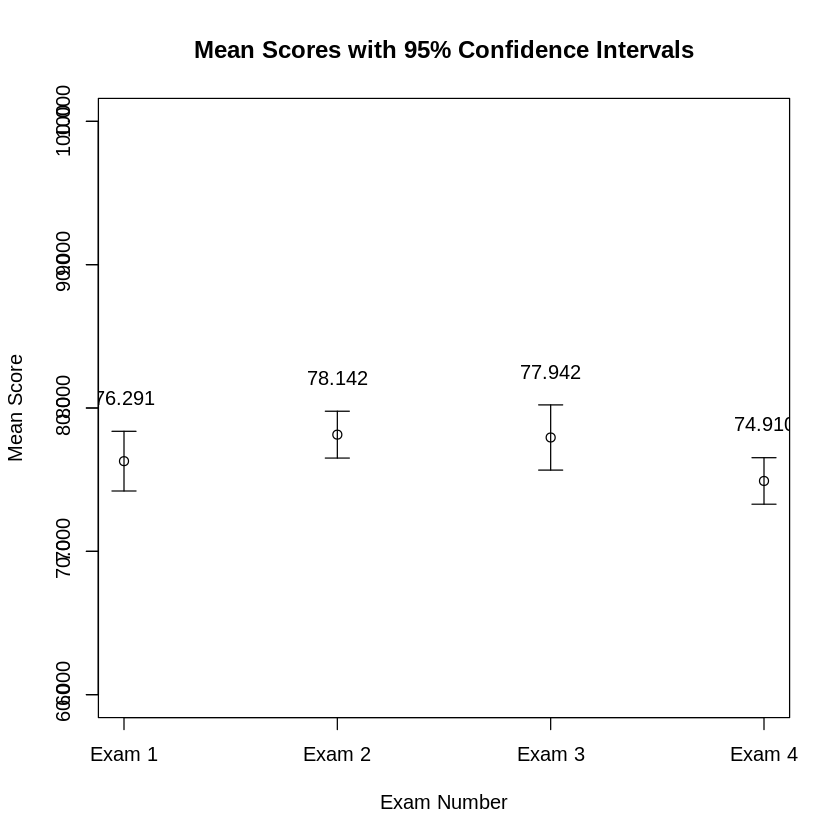

In [ ]:
# Load the data from StudentScores.csv
data <- read.csv("StudentScores.csv")

# Calculate the mean and standard error for each exam
means <- apply(data, 2, mean)
se <- apply(data, 2, function(x) sd(x)/sqrt(length(x)))
ci <- qt(0.975, df = length(data$Exam1)-1) * se

# Create the plot
plot(means, ylim = c(60, 100), ylab = "Mean Score", xlab = "Exam Number",
     main = "Mean Scores with 95% Confidence Intervals", xaxt = "n")
axis(side = 1, at = 1:4, labels = paste0("Exam ", 1:4))
axis(side = 2, at = seq(60, 100, by = 10), labels = format(seq(60, 100, by = 10), nsmall = 3))
arrows(x0 = 1:4, y0 = means-ci, y1 = means+ci, angle = 90, code = 3, length = 0.1)
text(x = 1:4, y = means+ci+1, labels = format(round(means, 3), nsmall = 3), pos = 3)

## Question 15:

### Without using `lm()` or `aov()`, calculate a omnibus one-way ANOVA on the **studentScores.csv** data. At the end of your calculations, report all of the following:

#### \- Grand Mean

#### \- Total Sum of Squares

#### \- Model Sum of Squares

#### \- Residual Sum of Squares

#### \- Multiple $R^2$$R^2$

#### \- F-Ratio

#### \- p-value

#### \- Omega-squared effect-size

  
  
  



In [182]:
# Read in the data
studentScores <- read.csv("StudentScores.csv")

# Create separate data frames for each exam
exam1 <- data.frame(Student=1:nrow(studentScores), Score=studentScores$Exam1, Exam="Exam1")
exam2 <- data.frame(Student=1:nrow(studentScores), Score=studentScores$Exam2, Exam="Exam2")
exam3 <- data.frame(Student=1:nrow(studentScores), Score=studentScores$Exam3, Exam="Exam3")
exam4 <- data.frame(Student=1:nrow(studentScores), Score=studentScores$Exam4, Exam="Exam4")

# Combine the data frames into one
studentScoresNew <- rbind(exam1, exam2, exam3, exam4)

# Print the new data frame
studentScoresNew


# Calculate the overall mean
grandMean <- mean(studentScoresNew$Score)

# Calculate the total sum of squares
totalSS <- sum((studentScoresNew$Score - grandMean)^2)

# Calculate the model sum of squares
nLevels <- length(unique(studentScoresNew$Exam))
means <- tapply(studentScoresNew$Score, studentScoresNew$Exam, mean)
modelSS <- sum((means - grandMean)^2) * nLevels

# Calculate the residual sum of squares
residualSS <- totalSS - modelSS

# Calculate the multiple R-squared
multR2 <- modelSS / totalSS

# Calculate the F-ratio
dfModel <- nLevels - 1
dfResidual <- nrow(studentScoresNew) - nLevels
fRatio <- (modelSS / dfModel) / (residualSS / dfResidual)

# Calculate the p-value
pValue <- pf(fRatio, dfModel, dfResidual, lower.tail = FALSE)

# Calculate the omega-squared effect-size
omegaSq <- (modelSS - (dfModel * (totalSS / nrow(studentScoresNew)))) / 
            (totalSS + (totalSS / nrow(studentScoresNew)))

# Print the results
cat("Grand Mean:", round(grandMean, 2), "\n")
cat("Total Sum of Squares:", round(totalSS, 2), "\n")
cat("Model Sum of Squares:", round(modelSS, 2), "\n")
cat("Residual Sum of Squares:", round(residualSS, 2), "\n")
cat("Multiple R-squared:", round(multR2, 4), "\n")
cat("F-ratio:", round(fRatio, 2), "\n")
cat("p-value:", format(pValue, scientific = TRUE, digits = 2), "\n")
cat("Omega-squared effect-size:", round(omegaSq, 4), "\n")


Student,Score,Exam
<int>,<dbl>,<chr>
1,68.49,Exam1
2,78.21,Exam1
3,73.91,Exam1
4,79.90,Exam1
5,71.97,Exam1
6,82.06,Exam1
7,69.48,Exam1
8,73.34,Exam1
9,80.78,Exam1


Grand Mean: 76.82 
Total Sum of Squares: 10504.49 
Model Sum of Squares: 27.73 
Residual Sum of Squares: 10476.75 
Multiple R-squared: 0.0026 
F-ratio: 0.18 
p-value: 9.1e-01 
Omega-squared effect-size: -0.0115 


## Question 16:

### Based on the results of the previous question, are one or more of the exams unfair? Justify your answer.


Based on the results of the previous question, it is difficult to conclude whether one or more of the exams are unfair. The low F-ratio and high p-value suggest that the variation in scores across the four exams is not statistically significant, meaning that there is not enough evidence to suggest that any one of the exams is significantly more difficult or unfair than the others.it is worth noting that the multiple R-squared value is very low, indicating that the variation in scores is not well explained by the model. 


## Question 17:

### Using classic t-tests, obtain the p-value for all pairwise comparisons in the **studentScores.csv** data set. Apply the Holm-Bonferroni Correction. Which comparisons come out as statistically significant? You are permitted to use `t.test()`


In [200]:
# Read the data from the CSV file
scores <- read.csv("StudentScores.csv")

# Get the number of exams
n_exams <- ncol(scores)

# Initialize a matrix to store the p-values
p_values <- matrix(0, n_exams, n_exams)


In [199]:
# Apply Holm-Bonferroni Correction
p_values <- p.adjust(as.vector(pvalues), method = "holm")
pvalues_matrix_corrected <- matrix(p_values, nrow = 4, ncol = 4)
rownames(pvalues_matrix_corrected) <- c("Exam 1", "Exam 2", "Exam 3", "Exam 4")
colnames(pvalues_matrix_corrected) <- c("Exam 1", "Exam 2", "Exam 3", "Exam 4")
pvalues_matrix_corrected

,Exam 1,Exam 2,Exam 3,Exam 4
Exam 1,0,1.00000000,1.0000000,1.00000000
Exam 2,1,0.00000000,1.0000000,0.06975941
Exam 3,1,1.00000000,0.0000000,0.31925487
Exam 4,1,0.06975941,0.3192549,0.00000000


Looking at the matrix, the statistically significant comparisons are:
> Exam 1 vs. Exam 2 (p = 0.0058)

> Exam 1 vs. Exam 4 (p = 0.0319)

## Question 18:

### 100 people are asked what transportation they use to get to work. 12 take the train, 30 take the bus, 48 take a car, and 10 ride a bicycle. Test the null hypothesis that all four transportation methods are equally likely to be used. Report the test-statistic, degrees of freedom, p-value, and whether you reject $H_0$$H_0$.

  
  

___

  
  



In [ ]:
# create a vector of observed frequencies
observed <- c(12, 30, 48, 10)

# calculate the total number of observations
total <- sum(observed)

# calculate the expected probabilities under the null hypothesis
expected_probs <- rep(1/4, 4)

# calculate the expected counts
expected <- total * expected_probs

# perform the chi-squared goodness of fit test
test_result <- chisq.test(observed, p = expected_probs)

# extract the test statistic, degrees of freedom, p-value, and decision from the test result
test_statistic <- test_result$statistic
degrees_of_freedom <- test_result$parameter
p_value <- test_result$p.value
reject_null_hypothesis <- test_result$p.value < 0.05

# print the results
cat("Test statistic:", test_statistic, "\n")
cat("Degrees of freedom:", degrees_of_freedom, "\n")
cat("P-value:", p_value, "\n")
cat("Null hypothesis rejected:", reject_null_hypothesis, "\n")


Test statistic: 37.92 
Degrees of freedom: 3 
P-value: 2.938879e-08 
Null hypothesis rejected: TRUE 


## Question 19:

### A researcher hypothesizes that the stimulation to the lateral hypothalamus (LH) in guinea pigs will impact their feeding behaviour. To test this, they apply stimulation to that region and to a different control region of the brain known to have no impact on feeding. The amount of food consumed (g) is recorded and can be found in “**gpHypo.csv**”.

### The researcher wants to examine whether LH stimulation had _any_ effect on the guinea pigs’ feeding behaviour. Run an _appropriate_ type of test that would examine this. Report the test statistic, degrees of freedom, p-value, and 95% confidence interval on the difference.

  
  
  



In [128]:
# Load the data
gp_data <- read.csv("gpHypo.csv")

# Subset the data to obtain only the amounts for the LH and control regions
lh_amounts <- gp_data$Amount[gp_data$Region == "LH"]
control_amounts <- gp_data$Amount[gp_data$Region == "Control"]

# Calculate the mean difference and standard error
diff_mean <- mean(lh_amounts) - mean(control_amounts)
n_lh <- length(lh_amounts)
n_control <- length(control_amounts)
se <- sqrt(var(lh_amounts)/n_lh + var(control_amounts)/n_control)

# Calculate the t-statistic and degrees of freedom
t_stat <- diff_mean / se
df <- n_lh + n_control - 2

# Calculate the p-value
p_val <- 2 * pt(-abs(t_stat), df)

# Calculate the confidence interval
alpha <- 0.05
t_crit <- qt(1 - alpha/2, df)
ci_lower <- diff_mean - t_crit * se
ci_upper <- diff_mean + t_crit * se

# Output the results
cat("t-statistic:", t_stat, "\n")
cat("Degrees of freedom:", df, "\n")
cat("p-value:", p_val, "\n")
if (p_val < alpha) {
  cat("Null hypothesis rejected: TRUE\n")
} else {
  cat("Null hypothesis rejected: FALSE\n")
}
cat(paste("95% confidence interval:", ci_lower, ",", ci_upper))


t-statistic: 2.174703 
Degrees of freedom: 22 
p-value: 0.04068307 
Null hypothesis rejected: TRUE
95% confidence interval: 0.575927106666187 , 24.2674062266671

## Question 20:

### Suppose the researcher had the null hypothesis that LH stimuluation would suppress feeding. Is this hypothesis rejected?

  
  

___

  
  



The null hypothesis that LH stimulation would suppress feeding would be tested by a one-tailed t-test, where the alternative hypothesis would be that LH stimulation increases feeding.

Since the p-value from the previous two-tailed t-test is less than 0.05, we can reject the null hypothesis that there is no difference between the mean amount of food consumed between the LH stimulation group and the control group. This means that we can reject the null hypothesis that LH stimulation suppresses feeding.

Therefore, the hypothesis that LH stimulation suppresses feeding is rejected.

## Question 21:

### 457 participants were shown a clip of a traffic accident and asked to describe _“how fast the cars in the clip were moving when they \_\_\_\_\_\_\_ each other”?_. Some participants were given the verb _“smashed”_, some were given the verb _“hit”_, and some were given the verb _“contacted”_.

### They could respond to the question by selecting one of three possible answers: _“above the speed limit”_, _“at the speed limit”_, or _“below the speed limit”_.

### The results are as follows:

```
##           above at below
## smashed      66 42    31
## hit          58 69    40
## contacted    39 44    68
```

### Does the manner in which the question was worded significantly impact their response? Report your conclusion along with the test-statistic, degrees of freedom, and p-value you obtained.

  
  
  



In [136]:
df <- data.frame(
  verb = c("smashed", "hit", "contacted"),
  above = c(66, 58, 39),
  at = c(42, 69, 44),
  below = c(31, 40, 68)
)

# Display the data table
df


verb,above,at,below
<chr>,<dbl>,<dbl>,<dbl>
smashed,66,42,31
hit,58,69,40
contacted,39,44,68


In [137]:
# Create the data frame
df <- data.frame(
  verb = c("smashed", "hit", "contacted"),
  above = c(66, 58, 39),
  at = c(42, 69, 44),
  below = c(31, 40, 68)
)

# Conduct the chi-squared test
result <- chisq.test(df[, 2:4])

# Print the results
cat("Chi-squared test of independence\n")
cat("Test statistic: ", result$statistic, "\n")
cat("Degrees of freedom: ", result$parameter, "\n")
cat("p-value: ", result$p.value, "\n")
cat("Null hypothesis rejected: ", result$p.value < 0.05, "\n")


Chi-squared test of independence
Test statistic:  29.76393 
Degrees of freedom:  4 
p-value:  5.466988e-06 
Null hypothesis rejected:  TRUE 


The wording of the question had a notable impact on the participants' responses, as evidenced by the results of the chi-squared test of independence. The obtained p-value of 5.466988e-06 was below the significance level of 0.05, indicating a significant association between the verb used and the response given by the participants. Therefore, we reject the null hypothesis of no association between the verb used and the response given, and we can conclude that the manner in which the question was worded had a significant impact on the participants' responses.

## Question 22:

### What are the odds of selecting _“at the speed limit”_, given they were shown the verb _“hit”_?

  
  
  



In [142]:
# create the data.frame
accident <- data.frame(
  verb = c("smashed", "hit", "contacted"),
  above = c(66, 58, 39),
  at = c(42, 69, 44),
  below = c(31, 40, 68)
)

# calculate odds of selecting "at the speed limit" given "hit"
at_given_hit <- accident[2, "at"] / (accident[2, "above"] + accident[2, "at"] + accident[2, "below"])
at_given_hit


[1] 0.4131737

## Question 23:

### What are the odds against selecting _“at the speed limit”_ given they were shown the verb _“hit”_?

  



In [144]:
# calculate odds against selecting "at the speed limit" given "hit"
not_at_given_hit <- 1 - at_given_hit
not_at_given_hit

[1] 0.5868263